In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [5]:
print("Shape:",df.shape)

Shape: (1143, 11)


In [6]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


**Significance of each statistic:**
* count - number of rows
* mean - mean of the dataset
* std - standard deviation of the dataset
* min - minimum value present in the dataset
* max - maximum value present in the dataset
* 25% - atleast one ad has been clicked by 25% of the people
*  50% - atleast one ad has been clicked by 50% of the people
* 75% - atleast one ad has been clicked by 75% of the people

**Insights found:** Hence we get an average of 2.85 as the conversion rate. A maximum of 21 people who saw the ad have later purchased the product.

## Products enquired 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Gender", hue="Age")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

KeyError: 'Age'

In [ ]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

**Insights found:**
*  More clicks have been done by women. But men in the age group of 30-34 have enquired more than women.
* The age group of 30-34 have enquired most about the product after seeing the ad.

## AD Clicks

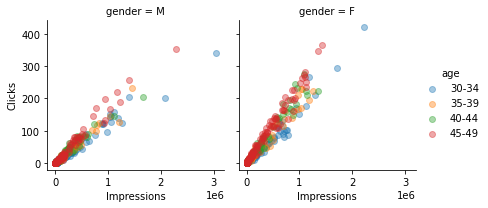

In [8]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

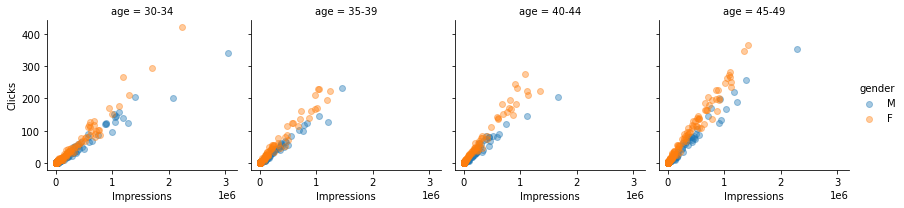

In [9]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

**Insights found:**
The age groups of 30-34 have clicked on the most number of ads

# People who bought the product

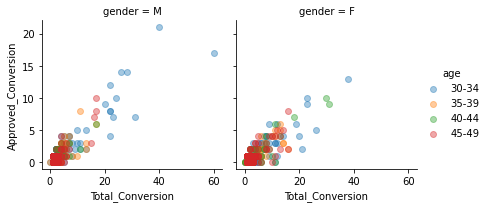

In [10]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

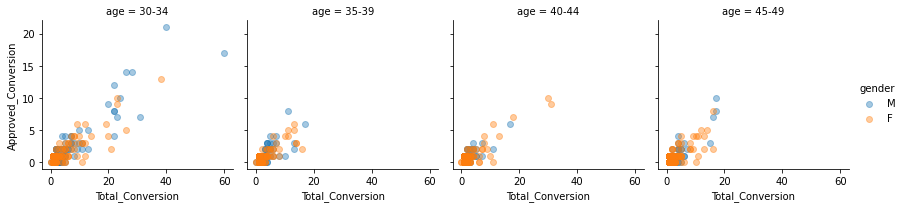

In [11]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

**Insights found:** Men and women in the age group of 30-34 have bought the product after enquiring about it.

## Analysis:
**With respect to Gender**

* Women clicks more on the ads than men
* Men tends to enquire more about the product than women
* More Men tends to buy product after enquiring than women

**With respect to Age**

* The age group of 35-39 showed least participation on clicking ads, enquiring about or buying the products
* The age group of 45-49 showed highest activity of clicking on ads
* The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups

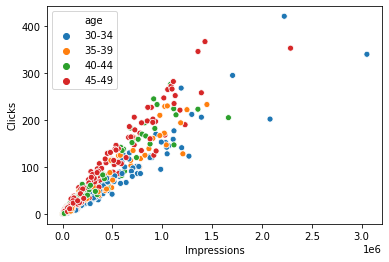

In [14]:
sns.scatterplot(x = 'Impressions' ,y='Clicks', hue='age', data=df)

# Sales vs Interests

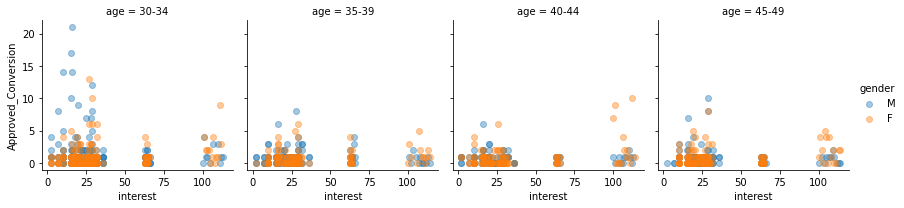

In [15]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

We can see a high number of sales on the age group for 30-34 for the prduct id between 0-30 

# ADs vs Money spent

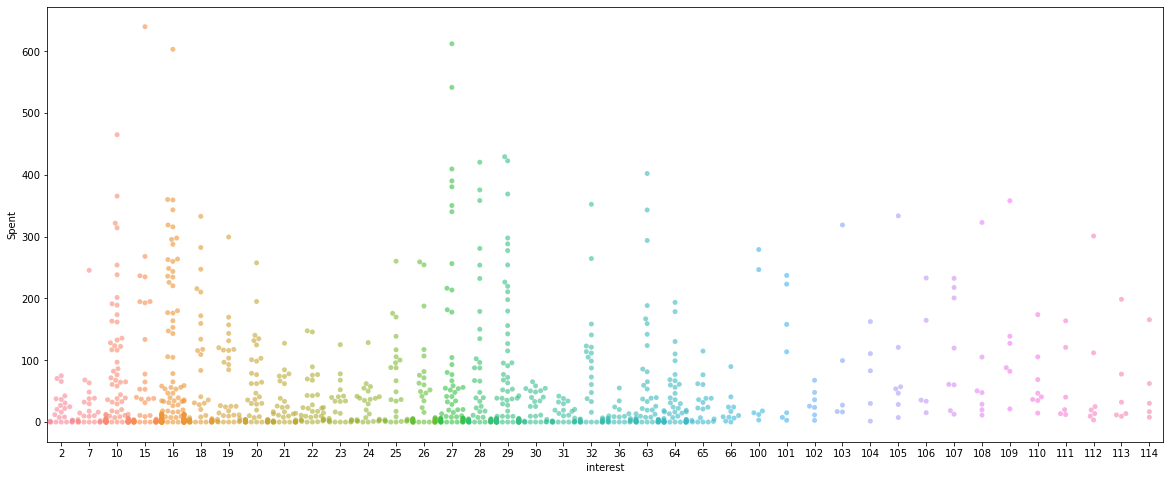

In [17]:
plt.figure(figsize=(20,8))
sns.swarmplot(x = 'interest' ,y='Spent', data=df, alpha = .6)

The most amount of money spent by companies for their ads lies in the categories of interest : 10, 15, 16, 27, 28, 29 and 63

# Gender vs Campaign

<Figure size 576x1080 with 0 Axes>

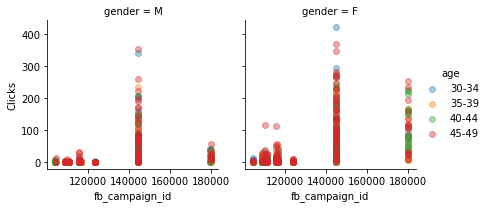

In [18]:
plt.figure(figsize=(8,15))
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "fb_campaign_id", "Clicks", alpha=.4)
g.add_legend()

<Figure size 576x1080 with 0 Axes>

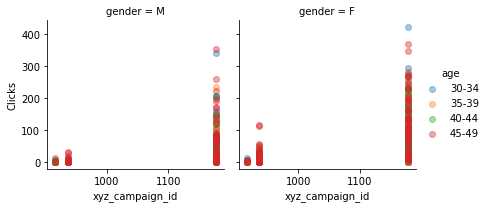

In [19]:
plt.figure(figsize=(8,15))
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "xyz_campaign_id", "Clicks", alpha=.4)
g.add_legend();

It shows that campaign ads from facebook and other companies had more female audience than male

# Sales vs Campaign

Facebook


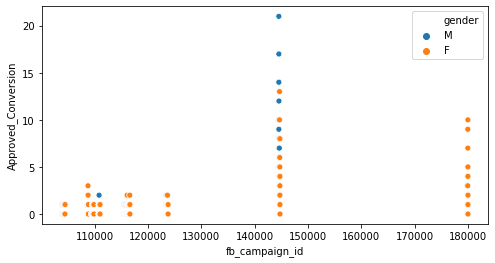

In [23]:
plt.figure(figsize=(8,4))
print('Facebook')
sns.scatterplot(x = 'fb_campaign_id' ,y='Approved_Conversion', hue='gender', data=df)


Others


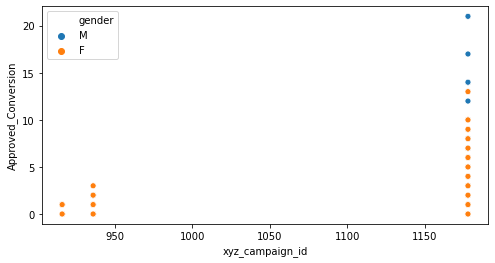

In [25]:
print('Others')
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Approved_Conversion', hue='gender', data=df)

# How and Why Facebook ads got more clicks

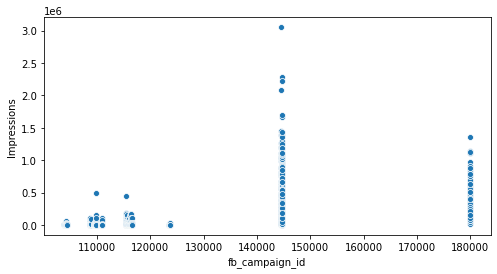

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Impressions', data=df)

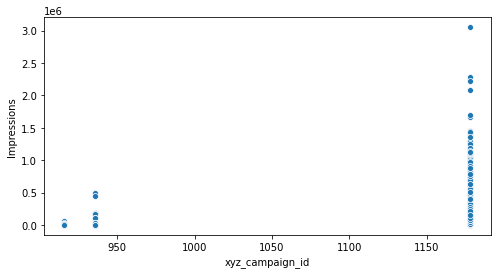

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Impressions', data=df)

The ads by xyz companies were displayed relatively fewer times than facebook ads. Hence fewer clicks than facebook ads

## Company vs Money spent

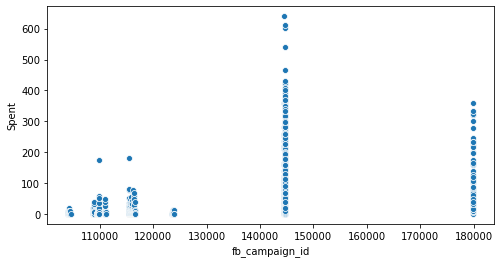

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Spent', data=df)

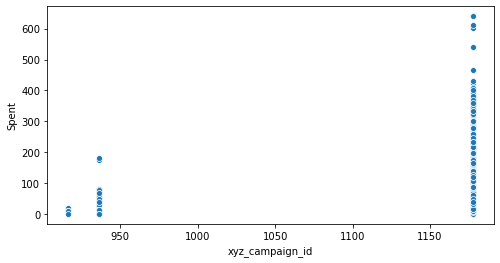

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Spent', data=df)

We can see that facebook spent more on ads than other companies as their ads were clicked more number of times.

# Campaign vs Company

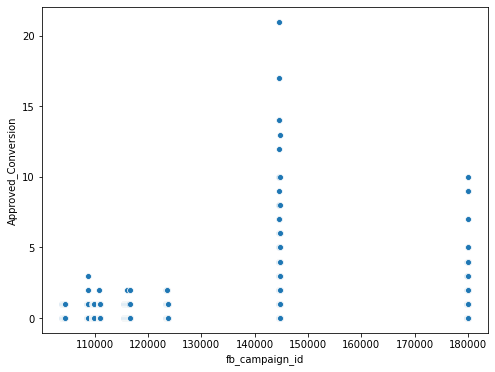

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'fb_campaign_id' ,y='Approved_Conversion', data=df)

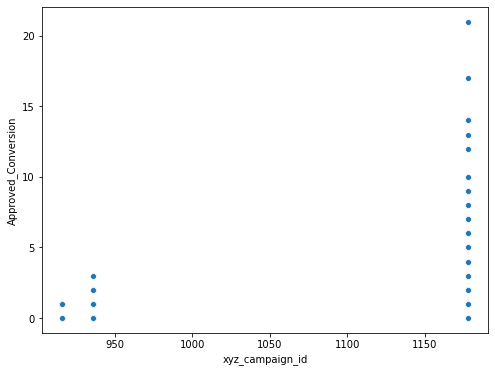

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Approved_Conversion', data=df)

In [36]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

**Insights found:** Facebook Campaign id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest. xyz company id 1178 perfomed the best by selling the product to as many as 21 people



# Important Insights:
The more impression of ads, the more likely ads will be clicked <br>
The highest amount of moneyspent by a company to display ads lies in the category of interests: 10, 15, 16, 27, 28, 29 and 63 <br>

**With respect to Gender**<br>
    Women clicks more on the ads than men<br>
    Men tends to enquire more about the product than women<br>
    More Men tends to buy product after enquiring than women<br>
    
**With respect to Age**<br>
    The age group of 45-49 showed highest activity of clicking on ads<br>
    The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups


* Facebook had more **sales** as compared to other companies
* Both the companies got highest amount **clicks** from age group 45-49 and gender female . Clearly, facebook ads got more clicks.
* Facebook ads were **shown more**
* Facebook **spent more money** on ads as they had more number of clicks
* For Facebook, **Campaign** id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest. For the rest of the companies(xyz), company id 1178 perfomed the best by selling the product to as many as 21 people
